In [1]:
import re
import requests
import lxml.html
import numpy as np
import pandas as pd
bestPictures = pd.read_excel('BestPictures.xlsx', index_col=0)
bestPictures

,Best Picture,Producers Guild,New York Film Critics Circle,Washington D.C. Area Film Critics Association,AFI Top 10,Phoenix Film Critics Society,Golden Globes,North Carolina Film Critics Association,Boston Society of Film Critics,National Board of Review Award,...,Toronto Film Critics Association,Los Angeles Film Critics Association,St. Louis Gateway Film Critics Association,Indiana Film Journalists Association,Houston Film Critics Society,Florida Film Critics Circle,Detroit Film Critics Society,Dallas–Fort Worth Film Critics Association,Directors Guild,Chicago Film Critics Association
2020,Nomadland,10.0,0.0,10.0,6.0,10.0,10.0,2.0,10.0,2.0,...,10.0,2.0,10.0,10.0,10.0,2.0,10.0,10.0,10,10.0
2019,Parasite,2.0,0.0,10.0,6.0,2.0,6.0,10.0,0.0,6.0,...,10.0,10.0,0.0,2.0,10.0,0.0,10.0,2.0,2,10.0
2018,Green Book,10.0,0.0,2.0,6.0,10.0,10.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2,0.0
2017,The Shape of Water,10.0,0.0,0.0,6.0,10.0,2.0,2.0,0.0,0.0,...,0.0,0.0,10.0,2.0,2.0,2.0,2.0,10.0,10,2.0
2016,Moonlight,2.0,0.0,2.0,6.0,2.0,10.0,2.0,0.0,2.0,...,10.0,10.0,0.0,10.0,2.0,2.0,2.0,10.0,2,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,Grand Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1931,Cimarron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1930,All Quiet on the Western Front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1929,The Broadway Melody,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [2]:
PG = bestPictures["Producers Guild"].sum()/bestPictures["Producers Guild"].count()
NY = bestPictures["New York Film Critics Circle"].sum()/bestPictures["New York Film Critics Circle"].count()
DC = bestPictures["Washington D.C. Area Film Critics Association"].sum()/bestPictures["Washington D.C. Area Film Critics Association"].count()
AFI = bestPictures["AFI Top 10"].sum()/bestPictures["AFI Top 10"].count()
PHX = bestPictures["Phoenix Film Critics Society"].sum()/bestPictures["Phoenix Film Critics Society"].count()
GG = bestPictures["Golden Globes"].sum()/bestPictures["Golden Globes"].count()
NC = bestPictures["North Carolina Film Critics Association"].sum()/bestPictures["North Carolina Film Critics Association"].count()
BOS = bestPictures["Boston Society of Film Critics"].sum()/bestPictures["Boston Society of Film Critics"].count()
NB = bestPictures["National Board of Review Award"].sum()/bestPictures["National Board of Review Award"].count()
LV = bestPictures["Las Vegas Film Critics Association"].sum()/bestPictures["Las Vegas Film Critics Association"].count()
OFC = bestPictures["Online Film Critics Society Award"].sum()/bestPictures["Online Film Critics Society Award"].count()
CC = bestPictures["Critic's Choice"].sum()/bestPictures["Critic's Choice"].count()
NS = bestPictures["National Society of Film Critics"].sum()/bestPictures["National Society of Film Critics"].count()
BAFTA = bestPictures["BAFTA"].sum()/bestPictures["BAFTA"].count()
SAG = bestPictures["SAG"].sum()/bestPictures["SAG"].count()

TF = bestPictures["Toronto Film Critics Association"].sum()/bestPictures["Toronto Film Critics Association"].count()
LA = bestPictures["Los Angeles Film Critics Association"].sum()/bestPictures["Los Angeles Film Critics Association"].count()
STL = bestPictures["St. Louis Gateway Film Critics Association"].sum()/bestPictures["St. Louis Gateway Film Critics Association"].count()
IND = bestPictures["Indiana Film Journalists Association"].sum()/bestPictures["Indiana Film Journalists Association"].count()
HOU = bestPictures["Houston Film Critics Society"].sum()/bestPictures["Houston Film Critics Society"].count()
FLA = bestPictures["Florida Film Critics Circle"].sum()/bestPictures["Florida Film Critics Circle"].count()
DET = bestPictures["Detroit Film Critics Society"].sum()/bestPictures["Detroit Film Critics Society"].count()
DFW = bestPictures["Dallas–Fort Worth Film Critics Association"].sum()/bestPictures["Dallas–Fort Worth Film Critics Association"].count()
CHI = bestPictures["Chicago Film Critics Association"].sum()/bestPictures["Chicago Film Critics Association"].count()
DG = bestPictures["Directors Guild"].sum()/bestPictures["Directors Guild"].count()

weights = [PG,NY,DC,AFI,PHX,GG,NC,BOS,NB,LV,OFC,CC,NS,BAFTA,SAG,TF,LA,STL,IND,HOU,FLA,DET,DFW,DG,CHI]

df = pd.DataFrame({'lab':bestPictures.columns[1:],
                   'val':weights})


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

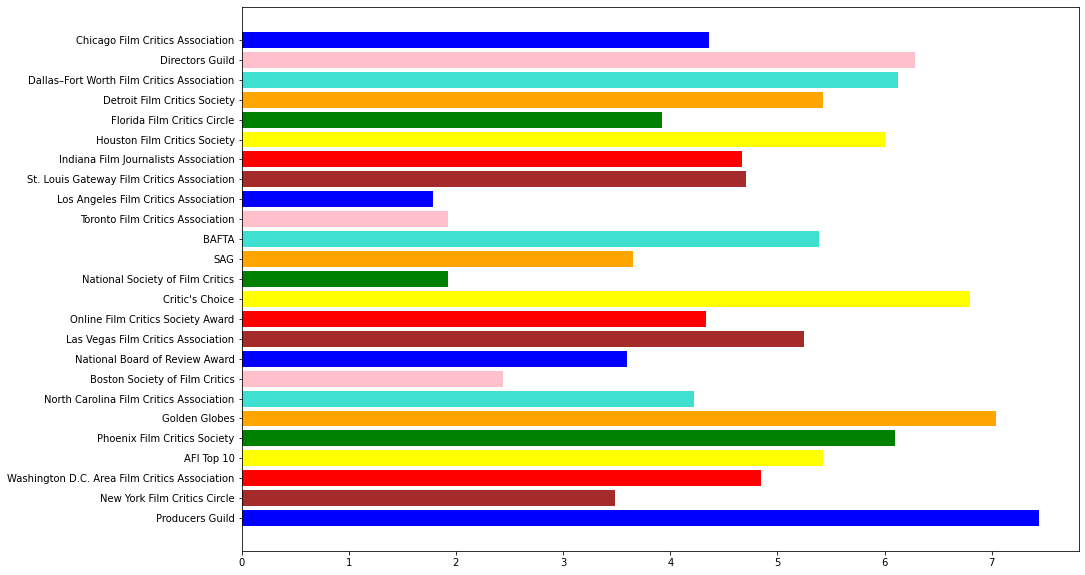

In [3]:
import matplotlib.pyplot as plt
import numpy as np
color = ["blue","brown","red","yellow","green","orange","turquoise","pink"]
%matplotlib inline
plt.figure(figsize=(15,10))
plt.barh(df['lab'], df['val'],color=[color[i%8] for i in range(26)])
plt

In [4]:
bp = bestPictures.fillna(-1)
for index, row in bestPictures.iterrows(): 
    total = 0
    i = 0
    nan = 0
    if index >= 1993: 
        for col in bestPictures:
            if i == 1:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PG*bp.loc[index,col])
            if i == 2:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NY*bp.loc[index,col])
            if i == 3:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DC*bp.loc[index,col])
            if i == 4:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(AFI*bp.loc[index,col])
            if i == 5:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PHX*bp.loc[index,col])
            if i == 6:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(GG*bp.loc[index,col])
            if i == 7:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NC*bp.loc[index,col])
            if i == 8:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BOS*bp.loc[index,col])
            if i == 9:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NB*bp.loc[index,col])
            if i == 10:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LV*bp.loc[index,col])
            if i == 11:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(OFC*bp.loc[index,col])
            if i == 12:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CC*bp.loc[index,col])
            if i == 13:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NS*bp.loc[index,col])
            if i == 14:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(SAG*bp.loc[index,col])
            if i == 15:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BAFTA*bp.loc[index,col])
            if i == 16:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(TF*bp.loc[index,col])
            if i == 17:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LA*bp.loc[index,col])
            if i == 18:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(STL*bp.loc[index,col])
            if i == 19:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(IND*bp.loc[index,col])
            if i == 20:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(HOU*bp.loc[index,col])
            if i == 21:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(FLA*bp.loc[index,col])
            if i == 22:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DET*bp.loc[index,col])
            if i == 23:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DFW*bp.loc[index,col])
            if i == 24:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CHI*bp.loc[index,col])
            if i == 25:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DG*bp.loc[index,col])
            i+=1
        bestPictures.loc[index,"Weighted Total"] = total/(25-nan)


In [5]:
belfast = ["Belfast",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
coda = ["CODA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
dlu = ["Don't Look Up",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
dmc = ["Drive My Car",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
dune = ["Dune",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
king = ["King Richard",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
lp = ["Licorice Pizza",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
night = ["Nightmare Alley",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
tpotd = ["The Power of the Dog",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
wss = ["West Side Story",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

contenders = pd.DataFrame([belfast,coda,dlu,dmc,dune,king,lp,night,tpotd,wss],columns = bestPictures.columns[:-1])
contenders = contenders.rename({'Best Picture': "Film"}, axis=1)
pd.set_option('display.max_columns', None)

#only noms


#done
contenders["New York Film Critics Circle"] = [0,0,0,2,0,0,0,0,0,0]
contenders["Washington D.C. Area Film Critics Association"] = [2,0,0,0,0,0,0,0,1,1]
contenders["AFI Top 10"] = [1.5,1.5,1.5,0,1.5,1.5,1.5,1.5,1.5,1.5]
contenders["Phoenix Film Critics Society"] = [2,0,1,0,1,0,1,1,1,1]
contenders["Golden Globes"] = [1,1,1,1.5,1,1,1,0,2,2]
contenders["North Carolina Film Critics Association"] = [0,0,0,1,1,0,1,0,2,1]
contenders["Boston Society of Film Critics"] = [0,0,0,2,0,0,0,0,0,0]
contenders["National Board of Review Award"] = [1,0,1,0,1,1,2,1,0,1]
contenders["Las Vegas Film Critics Association"] = [2,1,0,0,1,1,1,0,1,1]
contenders["Online Film Critics Society Award"] = [1,0,0,1,1,0,1,0,2,1]
contenders["National Society of Film Critics"] = [0,0,0,2,0,0,0,0,1,0]
contenders["Toronto Film Critics Association"] = [0,0,0,2,0,0,1,0,1,0]
contenders["Los Angeles Film Critics Association"] = [0,0,0,2,0,0,0,0,1,0]
contenders["St. Louis Gateway Film Critics Association"] = [1,0,0,0,0,0,2,0,1,1]
contenders["Indiana Film Journalists Association"] = [0,1,0,1,0,0,0,0,1,1]
contenders["Houston Film Critics Society"] = [1,1,1,0,1,1,1,0,1,0]
contenders["Florida Film Critics Circle"] = [0,0,0,0,0,0,0,0,2,0]
contenders["Detroit Film Critics Society"] = [1,1,1,0,0,1,0,0,0,0]
contenders["Dallas–Fort Worth Film Critics Association"] = [1,1,0,0,1,1,1,1,2,0]
contenders["Chicago Film Critics Association"] = [0,0,0,1,0,0,1,0,2,1]
contenders["SAG"] = [1,2,1,0,0,1,0,0,0,0]
contenders["BAFTA"] = [1,0,1,1.5,1,0,1,0,2,0]
contenders["Directors Guild"] = [1,0,0,0,1,0,1,0,2,1]
contenders["Critic's Choice"] = [1,1,1,1.5,1,1,1,1,2,1]
contenders["Producers Guild"] = [1,2,1,0,1,1,1,0,1,1]

contenders = contenders.replace(2, 10)
contenders = contenders.replace(1.5, 6)
contenders = contenders.replace(1, 2)
contenders

,Film,Producers Guild,New York Film Critics Circle,Washington D.C. Area Film Critics Association,AFI Top 10,Phoenix Film Critics Society,Golden Globes,North Carolina Film Critics Association,Boston Society of Film Critics,National Board of Review Award,Las Vegas Film Critics Association,Online Film Critics Society Award,Critic's Choice,National Society of Film Critics,SAG,BAFTA,Toronto Film Critics Association,Los Angeles Film Critics Association,St. Louis Gateway Film Critics Association,Indiana Film Journalists Association,Houston Film Critics Society,Florida Film Critics Circle,Detroit Film Critics Society,Dallas–Fort Worth Film Critics Association,Directors Guild,Chicago Film Critics Association
0,Belfast,2,0,10,6.0,10,2.0,0,0,2,10,2,2.0,0,2,2.0,0,0,2,0,2,0,2,2,2,0
1,CODA,10,0,0,6.0,0,2.0,0,0,0,2,0,2.0,0,10,0.0,0,0,0,2,2,0,2,2,0,0
2,Don't Look Up,2,0,0,6.0,2,2.0,0,0,2,0,0,2.0,0,2,2.0,0,0,0,0,2,0,2,0,0,0
3,Drive My Car,0,10,0,0.0,0,6.0,2,10,0,0,2,6.0,10,0,6.0,10,10,0,2,0,0,0,0,0,2
4,Dune,2,0,0,6.0,2,2.0,2,0,2,2,2,2.0,0,0,2.0,0,0,0,0,2,0,0,2,2,0
5,King Richard,2,0,0,6.0,0,2.0,0,0,2,2,0,2.0,0,2,0.0,0,0,0,0,2,0,2,2,0,0
6,Licorice Pizza,2,0,0,6.0,2,2.0,2,0,10,2,2,2.0,0,0,2.0,2,0,10,0,2,0,0,2,2,2
7,Nightmare Alley,0,0,0,6.0,2,0.0,0,0,2,0,0,2.0,0,0,0.0,0,0,0,0,0,0,0,2,0,0
8,The Power of the Dog,2,0,2,6.0,2,10.0,10,0,0,2,10,10.0,2,0,10.0,2,2,2,2,2,10,0,10,10,10
9,West Side Story,2,0,2,6.0,2,10.0,2,0,2,2,2,2.0,0,0,0.0,0,0,2,2,0,0,0,0,2,2


In [6]:
bp = contenders.fillna(-1)
for index, row in contenders.iterrows(): 
    total = 0
    i = 0
    nan = 0
    if index >= 0: 
        for col in contenders:
            if i == 1:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PG*bp.loc[index,col])
            if i == 2:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NY*bp.loc[index,col])
            if i == 3:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DC*bp.loc[index,col])
            if i == 4:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(AFI*bp.loc[index,col])
            if i == 5:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PHX*bp.loc[index,col])
            if i == 6:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(GG*bp.loc[index,col])
            if i == 7:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NC*bp.loc[index,col])
            if i == 8:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BOS*bp.loc[index,col])
            if i == 9:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NB*bp.loc[index,col])
            if i == 10:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LV*bp.loc[index,col])
            if i == 11:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(OFC*bp.loc[index,col])
            if i == 12:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CC*bp.loc[index,col])
            if i == 13:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NS*bp.loc[index,col])
            if i == 14:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(SAG*bp.loc[index,col])
            if i == 15:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BAFTA*bp.loc[index,col])
            if i == 16:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(TF*bp.loc[index,col])
            if i == 17:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LA*bp.loc[index,col])
            if i == 18:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(STL*bp.loc[index,col])
            if i == 19:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(IND*bp.loc[index,col])
            if i == 20:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(HOU*bp.loc[index,col])
            if i == 21:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(FLA*bp.loc[index,col])
            if i == 22:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DET*bp.loc[index,col])
            if i == 23:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DFW*bp.loc[index,col])
            if i == 24:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DG*bp.loc[index,col])
            if i == 25:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CHI*bp.loc[index,col])
            i+=1
        contenders.loc[index,"Weighted Total"] = total

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

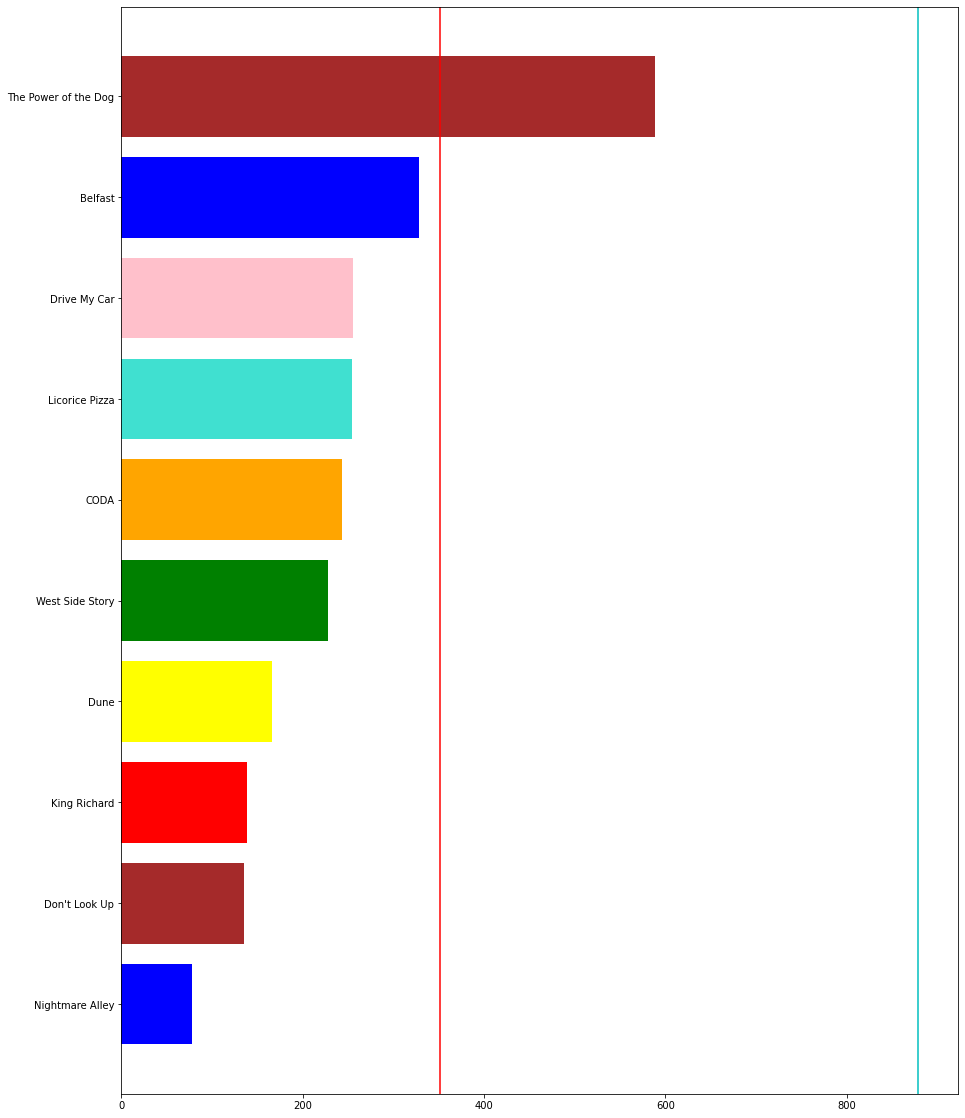

In [7]:
plt.figure(figsize=(15,20))
plt.axvline(x=bestPictures.loc[2018,"Weighted Total"]*25, color = "r")
plt.axvline(x=bestPictures.loc[2013,"Weighted Total"]*25, color = "c")
plt.barh(contenders.sort_values(by=['Weighted Total']).loc[:,"Film"], contenders.sort_values(by=['Weighted Total']).loc[:,"Weighted Total"],color=[color[i%8] for i in range(26)])
plt